In [6]:
import pandas as pd
import pickle
import numpy as np

In [7]:
train = pd.read_pickle("train_allfeats_11272022.pkl")
test = pd.read_pickle("test_allfeats_11272022.pkl")
train

,tweet_id,lang,res_image_vectors,vgg_image_vectors,tweet_text,label,event,new_img_id,clean_tweet,cl_len,...,Topic5,caption,capt_feats,Topic200,Topic300,new_ev,event_feat,Topic200_200,Topic200_300,Topic200_500
0,324597532548276224,en,"[tensor(0.0801), tensor(0.4296), tensor(0.8457...","[tensor(0.2593), tensor(4.9064), tensor(2.8281...",Don't need feds to solve the #bostonbombing wh...,fake,boston,boston_fake_03,"[don, need, feds, solve, bostonbombing, 4chan]",58,...,3,a group of people standing in a crowd of people,"[0.15120442708333334, 0.08012898763020833, 0.0...",46,46,[boston],"[-0.51171875, -0.08544921875, -0.060546875, 0....","[46, 197, 112, 186, 187, 25, 166, 175, 179, 15...","[46, 197, 112, 186, 187, 25, 166, 175, 179, 15...","[234, 46, 291, 312, 289, 447, 259, 147, 263, 3..."
1,325145334739267584,en,"[tensor(0.4698), tensor(2.9610), tensor(1.1333...","[tensor(0.1815), tensor(0.5811), tensor(-0.883...",PIC: Comparison of #Boston suspect Sunil Tripa...,fake,boston,boston_fake_23,"[pic, comparison, boston, suspect, sunil, trip...",139,...,3,a man is holding a dog in a hand,"[0.09038798014322917, 0.02313232421875, 0.0066...",36,289,[boston],"[-0.51171875, -0.08544921875, -0.060546875, 0....","[36, 87, 150, 134, 84, 65, 60, 4, 185, 175, 10...","[36, 87, 150, 134, 84, 65, 60, 4, 185, 175, 10...","[144, 497, 241, 203, 134, 326, 375, 386, 100, ..."
2,325152091423248385,en,"[tensor(0.1619), tensor(1.1982), tensor(0.7997...","[tensor(-2.1295), tensor(-3.1864), tensor(-0.8...",I'm not completely convinced that it's this Su...,fake,boston,boston_fake_34,"[completely, convinced, sunil, tripathi, fellow]",58,...,3,a man and a woman wearing a hat and a tie,"[0.077001953125, -0.010888671875, -0.069873046...",114,289,[boston],"[-0.51171875, -0.08544921875, -0.060546875, 0....","[114, 185, 29, 134, 21, 102, 60, 88, 103, 118,...","[114, 185, 29, 134, 21, 102, 60, 88, 103, 118,...","[144, 336, 397, 241, 326, 26, 203, 100, 0, 1, ..."
3,324315545572896768,en,"[tensor(1.9063), tensor(0.2896), tensor(0.5620...","[tensor(0.0101), tensor(0.4385), tensor(1.7428...",4chan and the bombing. just throwing it out th...,fake,boston,boston_fake_15,"[4chan, bombing, throwing, there]",41,...,4,a group of people standing in a crowd of peopl...,"[0.1258273654513889, 0.09067450629340278, 0.04...",46,46,[boston],"[-0.51171875, -0.08544921875, -0.060546875, 0....","[46, 134, 84, 157, 184, 119, 77, 116, 198, 26,...","[46, 134, 84, 157, 184, 119, 77, 116, 198, 26,...","[46, 439, 188, 70, 126, 0, 1, 2, 3, 4, 5, 6, 7..."
4,324581777614180352,en,"[tensor(0.9799), tensor(0.8480), tensor(0.3012...","[tensor(-0.6941), tensor(2.0015), tensor(-0.07...",4chan thinks they found pictures of the bomber...,fake,boston,boston_fake_08,"[4chan, thinks, found, pictures, bomber]",50,...,3,a group of people standing next to each other,"[0.07393391927083333, -0.016855875651041668, 0...",46,188,[boston],"[-0.51171875, -0.08544921875, -0.060546875, 0....","[46, 184, 64, 177, 171, 94, 143, 60, 84, 198, ...","[46, 184, 64, 177, 171, 94, 143, 60, 84, 198, ...","[378, 397, 46, 414, 235, 318, 257, 486, 160, 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9137,583783882182430722,en,"[tensor(0.0682), tensor(3.1315), tensor(2.9290...","[tensor(-1.5103), tensor(3.2010), tensor(-3.60...","In honor of our fellow Students, we pray the g...",real,garissa,garissa_04,"[honor, fellow, students, pray, govt, wins, st...",104,...,2,a group of people sitting at tables in a room,"[0.04371861049107143, 0.03033447265625, 0.0519...",75,75,[garissa],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[75, 131, 194, 144, 72, 146, 112, 133, 93, 173...","[75, 131, 194, 144, 72, 146, 112, 133, 93, 173...","[221, 75, 333, 329, 84, 0, 1, 2, 3, 4, 5, 6, 7..."
9138,583869095633911808,en,"[tensor(0.0682), tensor(3.1315), tensor(2.9290...","[tensor(-1.5103), tensor(3.2010), tensor(-3.60...",The horror image from inside #Kenya campus #Ga...,real,garissa,garissa_04,"[the, 

In [8]:
# create function to recode label field
def recode_annotation(txt_field):
    if txt_field == "fake":
        return 1
    else:
        return 0

# run function to recode label field.
train_labels = train['label'].apply(recode_annotation)
test_labels = test['label'].apply(recode_annotation)

In [9]:
train_txt = train['text_feats_1'].apply(pd.Series)
train_img = train['vgg_image_vectors'].apply(pd.Series)

In [10]:
test_txt = test['text_feats_1'].apply(pd.Series)
test_img = test['vgg_image_vectors'].apply(pd.Series)

# StandardScaler - Training

In [11]:
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler


#instantiate scaler on training data
scl_txt = StandardScaler(with_mean = True, with_std = False)
scl_img = StandardScaler(with_mean = True, with_std = False)

X_scaled = scl_txt.fit_transform(train_txt)

Y_scaled = scl_img.fit_transform(train_img)

print("Text Training Data dims:", X_scaled.shape)

print("Image Training Data dims:", Y_scaled.shape)

Text Training Data dims: (9142, 300)
Image Training Data dims: (9142, 4096)


# PCA -  Training

In [12]:
# import packages for modeling
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import PCA

pca_txt_mod = PCA(n_components = 100, svd_solver='full')

pca_img_mod = PCA(n_components = 100, svd_solver='full')

In [13]:
# Fit and transform text data
X = pca_txt_mod.fit_transform(X_scaled)

# Look at dims of transformed data

print("PCA training results - text: ", X.shape)

PCA training results - text:  (9142, 100)


In [14]:
# Fit and transform image data
Y = pca_img_mod.fit_transform(Y_scaled)


# Look at dims of transformed data
print("PCA training results - image: ", Y.shape)

PCA training results - image:  (9142, 100)


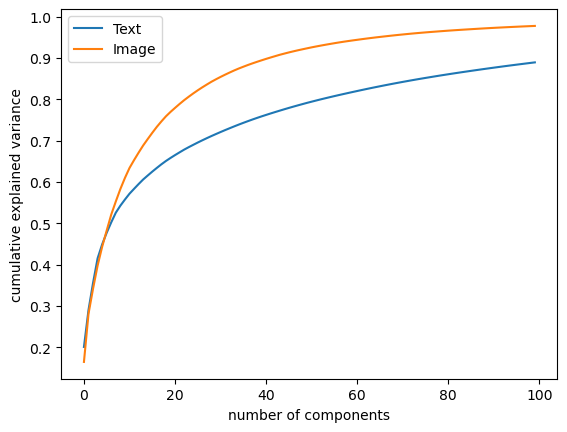

In [16]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca_txt_mod.explained_variance_ratio_),label='Text')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

plt.plot(np.cumsum(pca_img_mod.explained_variance_ratio_),label='Image')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

plt.legend()

# Testing

In [17]:
X_scaled_test = scl_txt.transform(test_txt)

Y_scaled_test = scl_img.transform(test_img)

In [18]:
test_txt_pca = pca_txt_mod.transform(X_scaled_test)
test_img_pca = pca_img_mod.transform(Y_scaled_test)

print("PCA testing results - text: ", test_txt_pca.shape)

print("PCA testing results - image: ", test_img_pca.shape)

PCA testing results - text:  (796, 100)
PCA testing results - image:  (796, 100)


In [19]:
np.savetxt("pca_train_txt.csv", X, delimiter=",")
np.savetxt("pca_train_img_vgg.csv", Y, delimiter=",")

In [20]:
np.save('pca_test_txt', test_txt_pca)
np.save('pca_test_img_vgg', test_img_pca)

In [21]:
np.save('train_labels', train_labels.ravel())
np.save('test_labels', test_labels.ravel())